In [1]:
pip install scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset with missing values and outliers
np.random.seed(42)
X = pd.DataFrame({
    'pH': np.random.normal(7, 0.5, 500),
    'Dissolved_Oxygen': np.random.normal(8, 1, 500),
    'Turbidity': np.random.normal(5, 2, 500),
    'Nitrate': np.random.normal(2, 0.3, 500),
    'Phosphate': np.random.normal(0.5, 0.1, 500)
})

# Introduce some missing values and outliers
X.loc[10:15, 'pH'] = np.nan  # Missing values
X.loc[20:25, 'Dissolved_Oxygen'] = np.nan
X.loc[30, 'Turbidity'] = 30  # Outlier
X.loc[40, 'Nitrate'] = -5  # Erroneous negative value

# Step 1: Impute Missing Values Using K-Nearest Neighbors
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 2: Detect Outliers Using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X_imputed)
X_imputed['Outlier'] = outliers

# Print rows identified as outliers
print("Detected Outliers:")
print(X_imputed[X_imputed['Outlier'] == -1])

# Step 3: Correct Erroneous Data with Machine Learning
# Using other features to predict likely values for each feature with detected issues
def correct_errors(data, target_column):
    # Separate normal rows (without outliers) to train the model
    normal_data = data[data['Outlier'] == 1].drop(columns=['Outlier'])
    corrupted_data = data[data['Outlier'] == -1].drop(columns=['Outlier'])
    
    # Train a model to predict the target column based on other features
    X_train = normal_data.drop(columns=[target_column])
    y_train = normal_data[target_column]
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict corrected values for rows with detected issues
    X_corrupted = corrupted_data.drop(columns=[target_column])
    corrected_values = model.predict(X_corrupted)
    
    # Apply corrections
    data.loc[corrupted_data.index, target_column] = corrected_values
    return data

# Correct outliers for each feature with issues
for feature in ['pH', 'Dissolved_Oxygen', 'Turbidity', 'Nitrate', 'Phosphate']:
    X_imputed = correct_errors(X_imputed, feature)

# Drop 'Outlier' column as it's no longer needed
X_cleaned = X_imputed.drop(columns=['Outlier'])

print("\nCleaned Data:")
print(X_cleaned.head())


Detected Outliers:
           pH  Dissolved_Oxygen  Turbidity   Nitrate  Phosphate  Outlier
24   6.727809          8.904604   8.455086  1.888338   0.198049       -1
26   6.424503          6.372458   5.076007  2.565376   0.680051       -1
30   6.699147          8.638592  30.000000  2.042266   0.580712       -1
31   7.926139          6.338480   1.662832  1.469468   0.402645       -1
35   6.389578          8.047399   8.147974  1.521589   0.775966       -1
40   7.369233          8.835692   8.367855 -5.000000   0.430529       -1
61   6.907171         10.075401  -0.697085  1.775836   0.486263       -1
66   6.963995          5.961875   2.410637  2.020097   0.256118       -1
83   6.740865         10.270693   9.153496  2.018504   0.270382       -1
101  6.789677          7.077835  -0.792511  2.412463   0.409795       -1
146  6.381525          5.303113   2.807450  1.943857   0.339910       -1
149  7.148492          8.696206   3.306077  2.776869   0.335681       -1
209  8.926366          9.696456 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [3]:
pip install catboost lightgbm tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Generate synthetic dataset (replace with actual data)
np.random.seed(42)
X = pd.DataFrame({
    'pH': np.random.normal(7, 0.5, 500),
    'Dissolved_Oxygen': np.random.normal(8, 1, 500),
    'Turbidity': np.random.normal(5, 2, 500),
    'Nitrate': np.random.normal(2, 0.3, 500),
    'Phosphate': np.random.normal(0.5, 0.1, 500)
})
y = 10 + 2 * X['pH'] - 1.5 * X['Dissolved_Oxygen'] + 0.8 * X['Turbidity'] + np.random.normal(0, 1, 500)

# Feature Engineering: Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(X.columns)
X_poly = pd.DataFrame(X_poly, columns=feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Standardize the data (optional, depending on model requirements)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train base models
catboost_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, silent=True, random_seed=42)
lightgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

catboost_model.fit(X_train, y_train)
lightgbm_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

# Generate predictions from base models
catboost_preds = catboost_model.predict(X_test)
lightgbm_preds = lightgbm_model.predict(X_test)
elasticnet_preds = elasticnet_model.predict(X_test)

# Stack base model predictions as inputs to the meta-model
meta_features_train = np.column_stack((catboost_model.predict(X_train), lightgbm_model.predict(X_train), elasticnet_model.predict(X_train)))
meta_features_test = np.column_stack((catboost_preds, lightgbm_preds, elasticnet_preds))

# Define a neural network meta-model
def build_meta_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

# Train the neural network meta-model
meta_model = build_meta_model(meta_features_train.shape[1])
meta_model.fit(meta_features_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.1)

# Final predictions
final_predictions = meta_model.predict(meta_features_test).flatten()

# Evaluate the hybrid model
mse = mean_squared_error(y_test, final_predictions)
print(f"Mean Squared Error of Hybrid Model: {mse:.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2356
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 20
[LightGBM] [Info] Start training from score 16.020392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error of Hybrid Model: 25.06


In [2]:
pip install numpy pandas catboost lightgbm scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.datasets import make_classification  # Import the make_classification function

# Sample dataset creation (replace with your actual dataset)
# Here, we use a binary classification problem for demonstration.
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Models
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)
lightgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1)

# Fit base models
catboost_model.fit(X_train, y_train)
lightgbm_model.fit(X_train, y_train)

# Fit ElasticNet using Logistic Regression for classification
elasticnet_model = LogisticRegression()
elasticnet_model.fit(X_train, y_train)

# Make predictions from the base models
catboost_preds = catboost_model.predict(X_test)
lightgbm_preds = lightgbm_model.predict(X_test)
elasticnet_preds = elasticnet_model.predict(X_test)


# Stacking predictions
stacked_predictions = np.vstack((catboost_preds, lightgbm_preds, elasticnet_preds)).T
# A simple majority vote can be used to combine predictions
final_predictions = [np.bincount(row).argmax() for row in stacked_predictions]

# Evaluate the model
accuracy = accuracy_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)


# Output the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.90
Recall: 0.85
F1 Score: 0.90


In [4]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Generate synthetic binary classification data
np.random.seed(42)
X = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 1000),
    'feature2': np.random.normal(1, 2, 1000),
    'feature3': np.random.normal(-1, 1, 1000),
})
y = np.random.randint(0, 2, 1000)  # Binary target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')


Precision: 0.54


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Generate synthetic data
np.random.seed(42)
X = pd.DataFrame({
    'pH': np.random.normal(7, 0.5, 500),
    'Dissolved_Oxygen': np.random.normal(8, 1, 500),
    'Turbidity': np.random.normal(5, 2, 500),
    'Nitrate': np.random.normal(2, 0.3, 500),
    'Phosphate': np.random.normal(0.5, 0.1, 500)
})
y = 10 + 2 * X['pH'] - 1.5 * X['Dissolved_Oxygen'] + 0.8 * X['Turbidity'] + np.random.normal(0, 1, 500)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters
n_bootstraps = 50  # Number of bootstrap samples
bootstrap_predictions = []

# Train models on bootstrap samples
for i in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_resampled, y_resampled)
    bootstrap_predictions.append(model.predict(X_test))

# Convert to numpy array for easier manipulation
bootstrap_predictions = np.array(bootstrap_predictions)

# Mean and standard deviation of predictions for uncertainty quantification
mean_predictions = np.mean(bootstrap_predictions, axis=0)
std_dev_predictions = np.std(bootstrap_predictions, axis=0)

# Evaluate with Mean Squared Error
mse = mean_squared_error(y_test, mean_predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Average Prediction Uncertainty (Standard Deviation): {np.mean(std_dev_predictions):.2f}")

# Display individual uncertainties per test sample
for i, (mean, std) in enumerate(zip(mean_predictions, std_dev_predictions)):
    print(f"Prediction {i+1}: Mean={mean:.2f}, Uncertainty (StdDev)={std:.2f}")


Mean Squared Error: 1.24
Average Prediction Uncertainty (Standard Deviation): 0.47
Prediction 1: Mean=20.61, Uncertainty (StdDev)=0.59
Prediction 2: Mean=15.31, Uncertainty (StdDev)=0.39
Prediction 3: Mean=21.06, Uncertainty (StdDev)=0.65
Prediction 4: Mean=16.37, Uncertainty (StdDev)=0.43
Prediction 5: Mean=16.33, Uncertainty (StdDev)=0.33
Prediction 6: Mean=14.82, Uncertainty (StdDev)=0.48
Prediction 7: Mean=17.25, Uncertainty (StdDev)=0.61
Prediction 8: Mean=17.77, Uncertainty (StdDev)=0.58
Prediction 9: Mean=18.30, Uncertainty (StdDev)=0.50
Prediction 10: Mean=16.71, Uncertainty (StdDev)=0.47
Prediction 11: Mean=16.95, Uncertainty (StdDev)=0.27
Prediction 12: Mean=12.62, Uncertainty (StdDev)=0.46
Prediction 13: Mean=14.38, Uncertainty (StdDev)=0.72
Prediction 14: Mean=15.46, Uncertainty (StdDev)=0.28
Prediction 15: Mean=20.22, Uncertainty (StdDev)=0.32
Prediction 16: Mean=16.42, Uncertainty (StdDev)=0.32
Prediction 17: Mean=20.26, Uncertainty (StdDev)=0.51
Prediction 18: Mean=14.35

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Prepare data (reusing X_train, X_test, y_train, y_test from above)

# Define neural network model with dropout
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),  # Dropout for uncertainty
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

# Train model
mc_dropout_model = build_model()
mc_dropout_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Monte Carlo Dropout Predictions
n_mc_samples = 50
mc_predictions = []

# Perform multiple stochastic forward passes
for _ in range(n_mc_samples):
    predictions = mc_dropout_model.predict(X_test, batch_size=16, verbose=0)
    mc_predictions.append(predictions)

# Convert to numpy array for easier manipulation
mc_predictions = np.array(mc_predictions).squeeze()

# Calculate mean and standard deviation for uncertainty
mean_mc_predictions = np.mean(mc_predictions, axis=0)
std_dev_mc_predictions = np.std(mc_predictions, axis=0)

# Evaluate with Mean Squared Error
mse_mc = mean_squared_error(y_test, mean_mc_predictions)
print(f"Mean Squared Error with Monte Carlo Dropout: {mse_mc:.2f}")
print(f"Average Prediction Uncertainty (Standard Deviation): {np.mean(std_dev_mc_predictions):.2f}")

# Display individual uncertainties per test sample
for i, (mean, std) in enumerate(zip(mean_mc_predictions, std_dev_mc_predictions)):
    print(f"Prediction {i+1}: Mean={mean:.2f}, Uncertainty (StdDev)={std:.2f}")


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error with Monte Carlo Dropout: 1.18
Average Prediction Uncertainty (Standard Deviation): 0.00
Prediction 1: Mean=20.99, Uncertainty (StdDev)=0.00
Prediction 2: Mean=15.47, Uncertainty (StdDev)=0.00
Prediction 3: Mean=20.24, Uncertainty (StdDev)=0.00
Prediction 4: Mean=17.08, Uncertainty (StdDev)=0.00
Prediction 5: Mean=17.15, Uncertainty (StdDev)=0.00
Prediction 6: Mean=14.15, Uncertainty (StdDev)=0.00
Prediction 7: Mean=17.64, Uncertainty (StdDev)=0.00
Prediction 8: Mean=16.73, Uncertainty (StdDev)=0.00
Prediction 9: Mean=18.43, Uncertainty (StdDev)=0.00
Prediction 10: Mean=16.87, Uncertainty (StdDev)=0.00
Prediction 11: Mean=16.96, Uncertainty (StdDev)=0.00
Prediction 12: Mean=12.17, Uncertainty (StdDev)=0.00
Prediction 13: Mean=15.07, Uncertainty (StdDev)=0.00
Prediction 14: Mean=15.81, Uncertainty (StdDev)=0.00
Prediction 15: Mean=20.66, Uncertainty (StdDev)=0.00
Prediction 16: Mean=15.76, Uncertainty (StdDev)=0.00
Prediction 17: Mean=20.23, Uncertainty (StdDev)=0.00


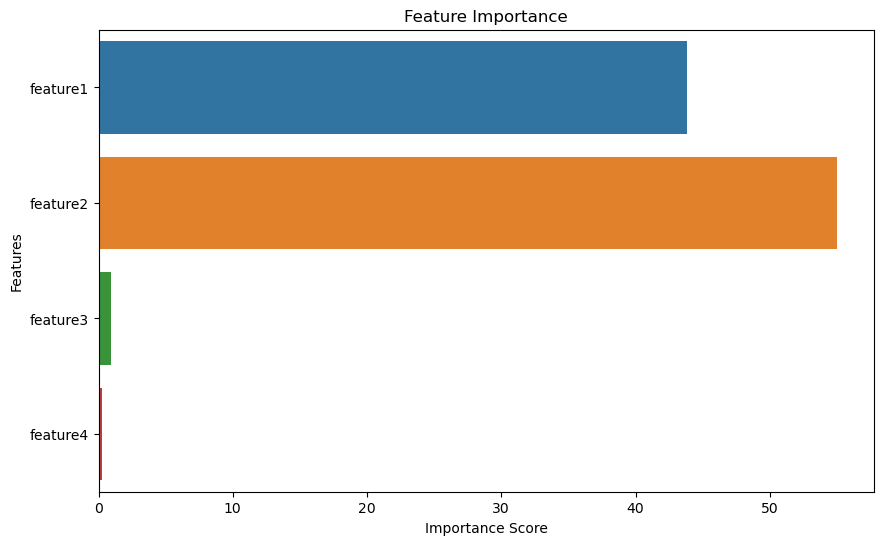

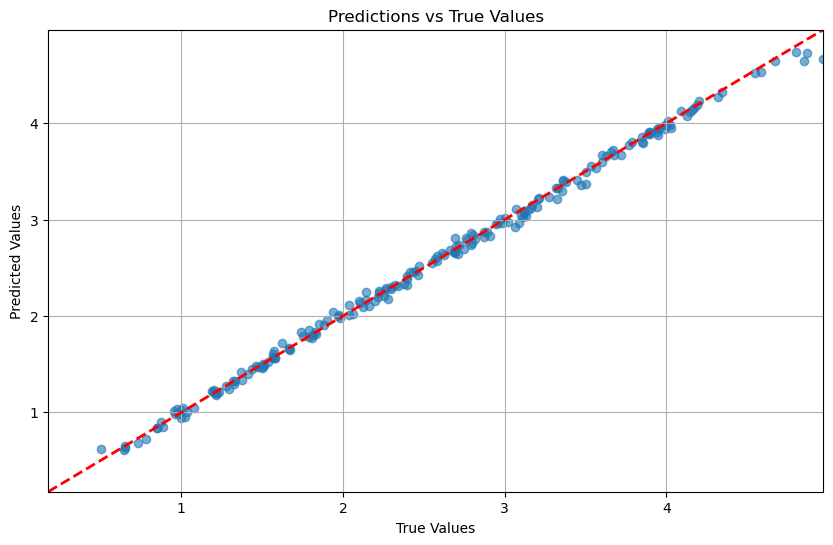

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
def create_synthetic_data(num_samples=1000):
    X = pd.DataFrame({
        'feature1': np.random.rand(num_samples),
        'feature2': np.random.rand(num_samples),
        'feature3': np.random.rand(num_samples),
        'feature4': np.random.rand(num_samples),
    })
    y = (X['feature1'] * 2 + X['feature2'] * 3 + np.random.rand(num_samples) * 0.1).values
    return X, y

# Create synthetic dataset
X, y = create_synthetic_data()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 1. Feature Importance
feature_importances = model.get_feature_importance()
features = X.columns

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 2. Visualization of Predictions vs True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)  # Diagonal line
plt.title('Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


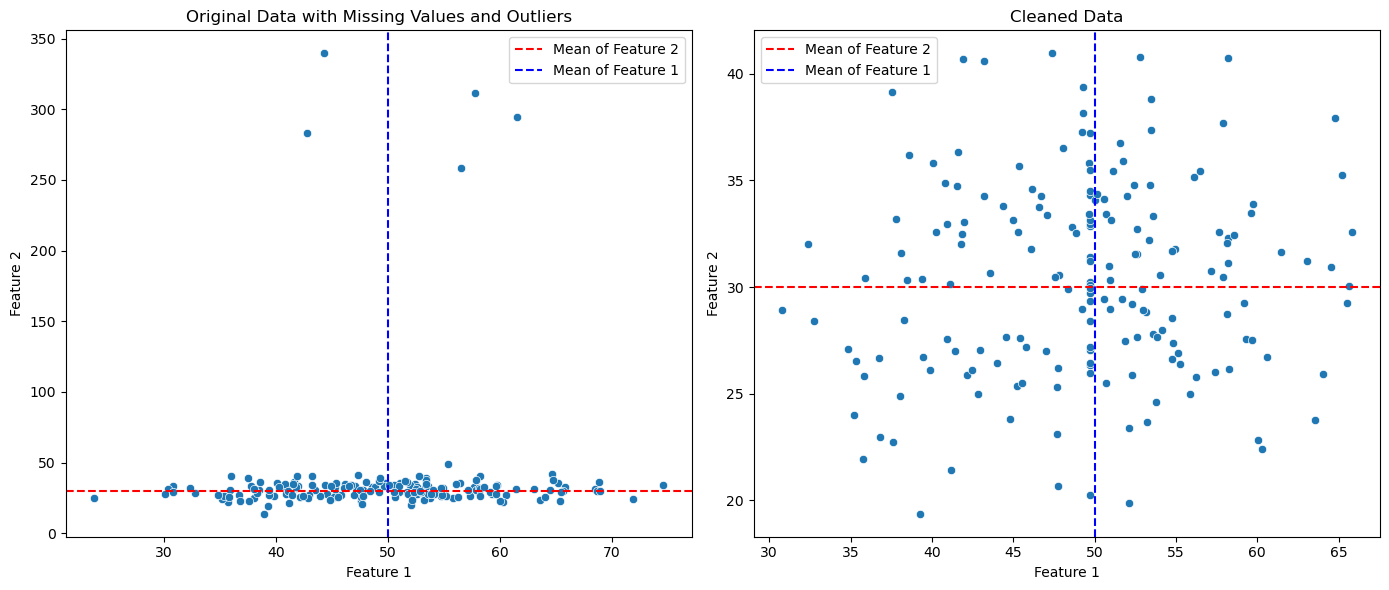

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

# Set random seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset
def create_synthetic_data(num_samples=200):
    # Generate random data
    data = {
        'feature1': np.random.normal(loc=50, scale=10, size=num_samples),  # Normal distribution
        'feature2': np.random.normal(loc=30, scale=5, size=num_samples),   # Normal distribution
    }
    df = pd.DataFrame(data)

    # Introduce missing values
    df.loc[np.random.choice(df.index, size=20, replace=False), 'feature1'] = np.nan

    # Introduce outliers
    outliers = np.random.choice(df.index, size=5, replace=False)
    df.loc[outliers, 'feature2'] = df['feature2'] * 10  # Inflate the outlier feature

    return df

# Create synthetic data
df = create_synthetic_data()

# Visualize the original data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='feature1', y='feature2', data=df)
plt.title('Original Data with Missing Values and Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(y=30, color='r', linestyle='--', label='Mean of Feature 2')
plt.axvline(x=50, color='b', linestyle='--', label='Mean of Feature 1')
plt.legend()

# Data Cleaning: Impute Missing Values
imputer = SimpleImputer(strategy='mean')
df['feature1'] = imputer.fit_transform(df[['feature1']])

# Use Isolation Forest to detect and remove outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_outlier'] = iso_forest.fit_predict(df[['feature1', 'feature2']])
cleaned_df = df[df['is_outlier'] == 1].drop(columns='is_outlier')

# Visualize the cleaned data
plt.subplot(1, 2, 2)
sns.scatterplot(x='feature1', y='feature2', data=cleaned_df)
plt.title('Cleaned Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(y=30, color='r', linestyle='--', label='Mean of Feature 2')
plt.axvline(x=50, color='b', linestyle='--', label='Mean of Feature 1')
plt.legend()

plt.tight_layout()
plt.show()


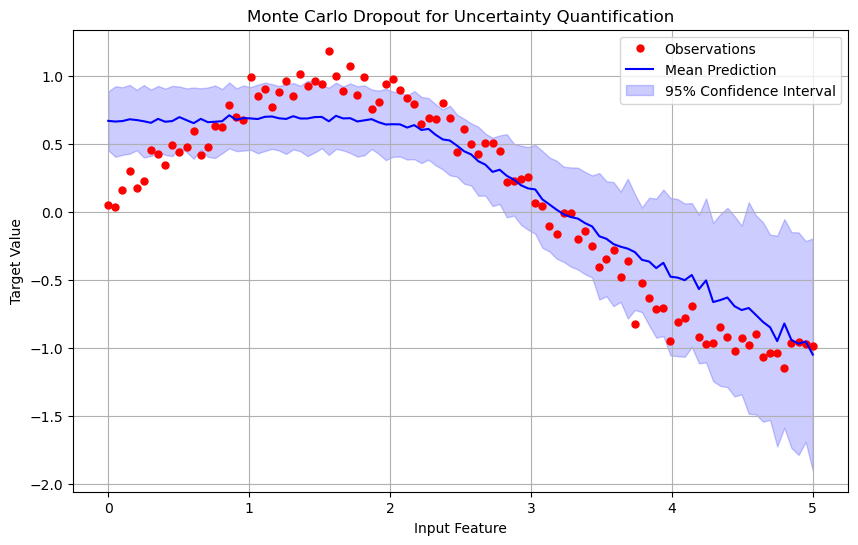

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic data
def generate_data(n_samples=100):
    X = np.linspace(0, 5, n_samples)
    y = np.sin(X) + np.random.normal(0, 0.1, n_samples)  # Sine wave with noise
    return X, y

# Create synthetic data
X, y = generate_data()

# Build a simple neural network model
def build_model():
    model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer for uncertainty quantification
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Another Dropout layer
        layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the model
model = build_model()
model.fit(X, y, epochs=200, verbose=0)

# Monte Carlo Dropout for uncertainty quantification
def predict_with_uncertainty(model, X, n_iter=100):
    predictions = []
    for _ in range(n_iter):
        preds = model(X, training=True)  # Set training=True to use dropout
        predictions.append(preds.numpy())
    return np.array(predictions)

# Make predictions with uncertainty
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
predictions = predict_with_uncertainty(model, X_test, n_iter=100)
mean_preds = predictions.mean(axis=0)
std_preds = predictions.std(axis=0)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label='Observations')  # Original data points
plt.plot(X_test, mean_preds, 'b-', label='Mean Prediction')  # Predicted mean
plt.fill_between(X_test.flatten(), 
                 (mean_preds - 1.96 * std_preds).flatten(), 
                 (mean_preds + 1.96 * std_preds).flatten(), 
                 alpha=0.2, color='blue', label='95% Confidence Interval')  # Confidence intervals

plt.title('Monte Carlo Dropout for Uncertainty Quantification')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.grid()
plt.show()


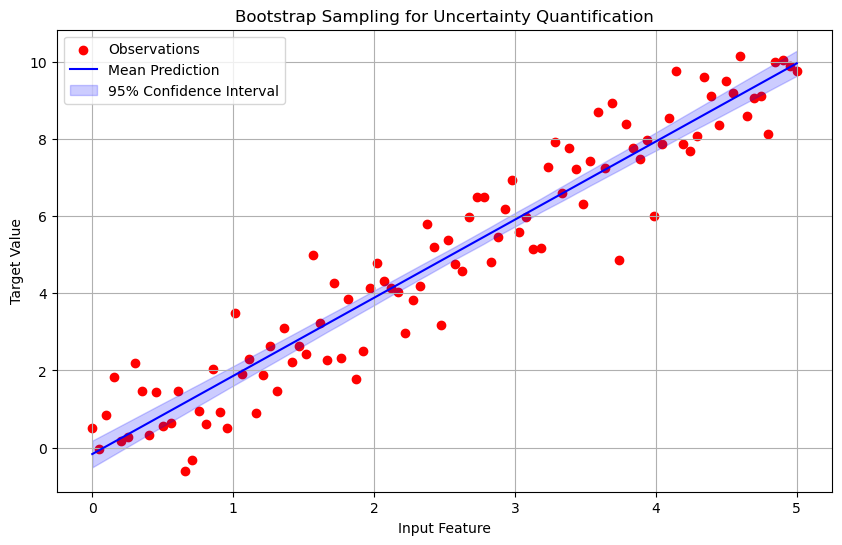

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_data(n_samples=100):
    X = np.linspace(0, 5, n_samples).reshape(-1, 1)
    y = 2 * X.flatten() + np.random.normal(0, 1, n_samples)  # Linear relationship with noise
    return X, y

# Create synthetic data
X, y = generate_data()

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Function to perform bootstrap sampling
def bootstrap_predictions(model, X, y, n_iterations=1000):
    n_samples = len(y)
    predictions = np.zeros((n_iterations, len(X)))

    for i in range(n_iterations):
        # Bootstrap sampling
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]
        
        # Fit model on bootstrap sample
        model.fit(X_bootstrap, y_bootstrap)
        
        # Store predictions
        predictions[i] = model.predict(X)

    return predictions

# Generate bootstrap predictions
n_iterations = 1000
bootstrap_preds = bootstrap_predictions(model, X, y, n_iterations)

# Calculate mean and confidence intervals
mean_preds = bootstrap_preds.mean(axis=0)
lower_ci = np.percentile(bootstrap_preds, 2.5, axis=0)  # 2.5 percentile
upper_ci = np.percentile(bootstrap_preds, 97.5, axis=0)  # 97.5 percentile

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observations')  # Original data points
plt.plot(X, mean_preds, 'blue', label='Mean Prediction')  # Predicted mean
plt.fill_between(X.flatten(), lower_ci, upper_ci, color='blue', alpha=0.2, label='95% Confidence Interval')  # Confidence intervals

plt.title('Bootstrap Sampling for Uncertainty Quantification')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.grid()
plt.show()
